# Exploit a model

This notebook will show how to retrieve an optimized models and how to plot the traces produced by the model.

Note that the traces and scores of all models should also be in the directory ../figures/ if you ran the step analysis of the pipeline.

In [13]:
from bluepyemodel.access_point.local import LocalAccessPoint
from bluepyemodel.evaluation.evaluation import get_evaluator_from_access_point
import pprint

In [14]:
emodel = "L5PC"
githash = None

In [15]:
if githash is None:
    emodel_dir = "."
else:
    emodel_dir = f"./run/{githash}"

access_point = LocalAccessPoint(
    emodel=emodel,
    final_path="./final.json",
    emodel_dir=emodel_dir,
    iteration_tag=githash,
    recipes_path='./config/recipes.json',
)

Retrieve all of the models matching the githash and emodel name considered:

In [16]:
emodels = access_point.get_emodels()
print(f"Number of emodels: {len(emodels)}")

Number of emodels: 1


Select the model having the lowest fitness:

In [17]:
emodel = sorted(emodels, key=lambda x: x.fitness)[0]
pprint.pprint(vars(emodel))

{'emodel_metadata': <bluepyemodel.emodel_pipeline.emodel_metadata.EModelMetadata object at 0x7fe1f9b51310>,
 'evaluator': None,
 'features': {'APWaveform_300.soma.v.AP_amplitude': 50.039797009372045,
              'IDRest_200.soma.v.AP_amplitude': 49.630648650203064,
              'IDRest_200.soma.v.Spikecount': 17.0,
              'IDRest_200.soma.v.voltage_base': -71.91883808392708},
 'fitness': 0.8687488995320345,
 'parameters': {'constant.distribution_decay': -0.02544253178789003,
                'decay_CaDynamics_DC0.axonal': 20.000000139999997,
                'decay_CaDynamics_DC0.somatic': 175.33769080426165,
                'e_pas.all': -71.68554706165426,
                'gCa_HVAbar_Ca_HVA2.apical': 8.807947390959207e-05,
                'gCa_HVAbar_Ca_HVA2.axonal': 0.000900095743681961,
                'gCa_HVAbar_Ca_HVA2.basal': 2.767439659468225e-05,
                'gCa_HVAbar_Ca_HVA2.somatic': 0.00021789251296703145,
                'gCa_LVAstbar_Ca_LVAst.apical': 0.0004

Instantiate an evaluator, necessary to run the protocols on the model:

In [18]:
evaluator = get_evaluator_from_access_point(
    access_point,
    stochasticity=False,
    include_validation_protocols=True,
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:88: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '


Run the protocols and obtain the response of the model:

In [19]:
for i in range(len(evaluator.params)):
    evaluator.params[i].unfreeze()

responses = evaluator.run_protocols(protocols=evaluator.fitness_protocols.values(), param_values=emodel.parameters)

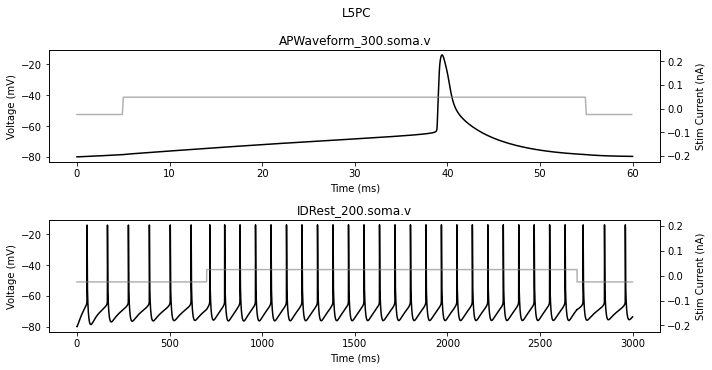

In [20]:
from bluepyemodel.emodel_pipeline import plotting
import matplotlib.pyplot as plt

stimuli = evaluator.fitness_protocols["main_protocol"].protocols

recording_names = plotting.get_recording_names(access_point.get_fitness_calculator_configuration().protocols, stimuli)

fig, axs = plotting.traces(model=emodel, responses=responses, recording_names=recording_names,  stimuli=stimuli, write_fig=False)

Finally, we can compute and display the scores of the model:

In [21]:
scores = evaluator.fitness_calculator.calculate_scores(responses)
pprint.pprint(scores)

{'APWaveform_300.soma.v.AP_amplitude': 250.0,
 'IDRest_200.soma.v.AP_amplitude': 0.6008432007114232,
 'IDRest_200.soma.v.Spikecount': 1.0742378173594334,
 'IDRest_200.soma.v.voltage_base': 0.8166137992194914}
